## A scikit-learn compatible method for estimation of a good enough number of clusters with WCSS metric
I transformed my function for numeric application of Elbow method into scikit-learn Estimator class. Now you can be imported and an object initialized. The object contains method 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
import warnings
import EstimatedClusterNumberWithWCSS as ECNW
from sklearn.cluster import KMeans
from tqdm import trange

Let us defne properties which will be the same for all considered clusters.

In [2]:
true_cluster_n = 6
points_per_cluster = 500
possible_cluster_n = 12

Here is a function to convert a  list of class numbers into list of colors, so they can used for plotting with 
`seaborn`.

In [3]:
def _6_colors(labels):
    # colors from colorbrewer2.org: 
    # ['#b2182b','#ef8a62','#fddbc7','#d1e5f0','#67a9cf','#2166ac']
    colors=['#b2182b']*len(labels)
    for i in range(len(labels)):
        if (labels[i] ==0):
            colors[i] = '#ef8a62'
        elif (labels[i]==1):
            colors[i] = '#fddbc7'
        elif (labels[i]==2):
            colors[i] = '#d1e5f0'
        elif (labels[i]==3):
            colors[i] = '#67a9cf'
        elif (labels[i]==4):
            colors[i] = '#2166ac'
        
    return(colors)

I would like to run my method a few times on clusters generated by `scikit-learn` method `make_blobs` to show how it works. Each time we will have a distinct `random_state` to produce a set 6 blobs. We will see blob and cluster visualizations, what was chosen as recommended number and what other possible cluster number were calculated and how many times they appeared. If clustering does not appear to be sufficiently optimal for provided conditions we will see a warning message. My treshold to decide if an estimated number is good is for the number to appear not less than in about 2/3 of cases. The treshold value is one of the method parameters. Note that the message comes from the estimating number of clusters method, and it will appear before plots and results of clustering.

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

The most frequent value = 6
Frequency counts with random state = 0:
{6: 99, 12: 1}


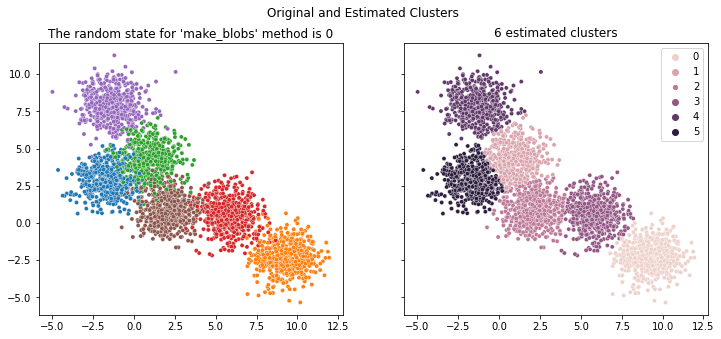

 12%|██████████▏                                                                      | 1/8 [15:35<1:49:07, 935.33s/it]

The most frequent value = 5
Frequency counts with random state = 1:
{5: 84, 11: 6, 6: 5, 12: 4, 9: 1}


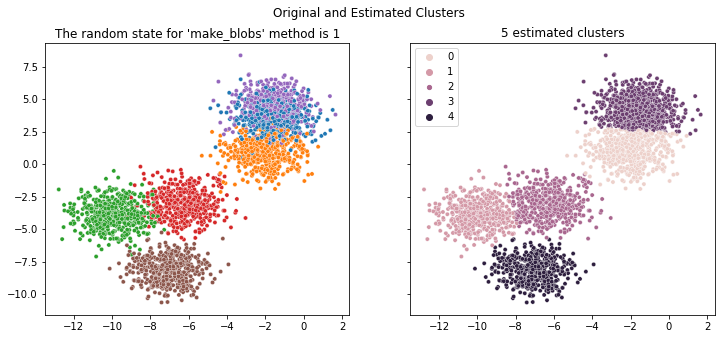

 25%|████████████████████▎                                                            | 2/8 [30:49<1:32:17, 922.97s/it]

The most frequent value = 6
Frequency counts with random state = 2:
{6: 99, 12: 1}


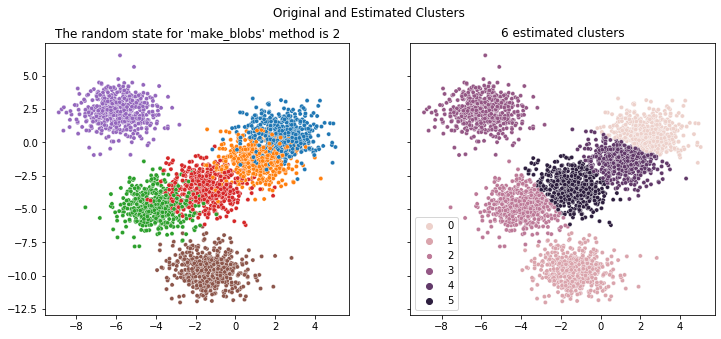

 38%|██████████████████████████████▍                                                  | 3/8 [46:14<1:16:59, 923.98s/it]


                      reliable result, although it can suffice for
                      your business/research objective. It might 
                      be improved with other parameters or methods.
The most frequent value = 11
Frequency counts with random state = 3:
{11: 46, 5: 45, 6: 6, 12: 3}


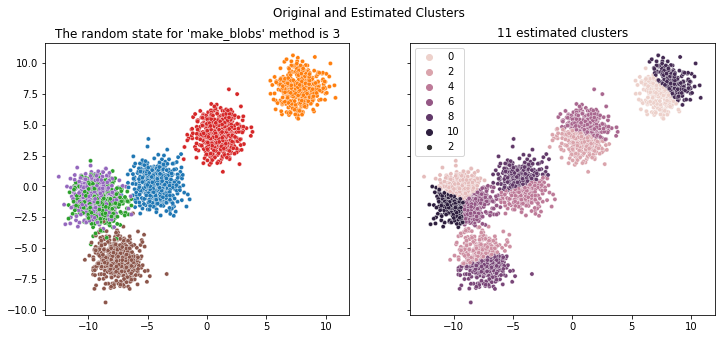

 50%|████████████████████████████████████████▌                                        | 4/8 [1:00:24<59:38, 894.71s/it]

The most frequent value = 6
Frequency counts with random state = 4:
{6: 94, 12: 5, 11: 1}


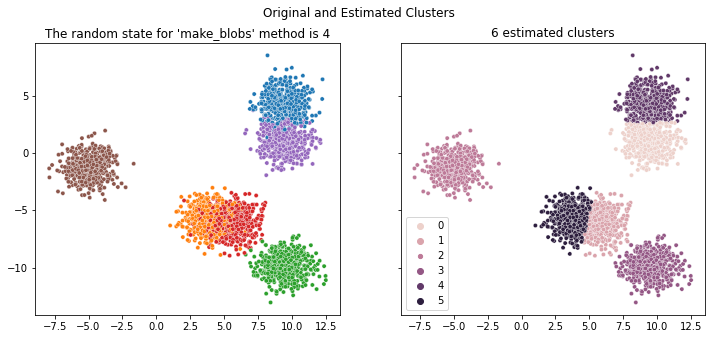

 62%|██████████████████████████████████████████████████▋                              | 5/8 [1:14:29<43:50, 876.82s/it]


                      reliable result, although it can suffice for
                      your business/research objective. It might 
                      be improved with other parameters or methods.
The most frequent value = 5
Frequency counts with random state = 5:
{5: 49, 11: 32, 6: 12, 10: 7}


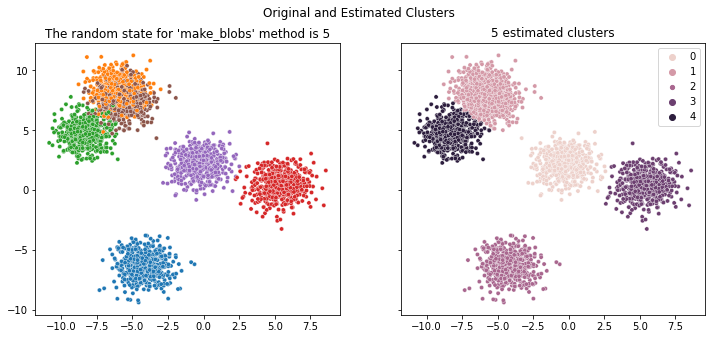

 75%|████████████████████████████████████████████████████████████▊                    | 6/8 [1:28:51<29:03, 871.83s/it]

The most frequent value = 6
Frequency counts with random state = 6:
{6: 96, 12: 3, 11: 1}


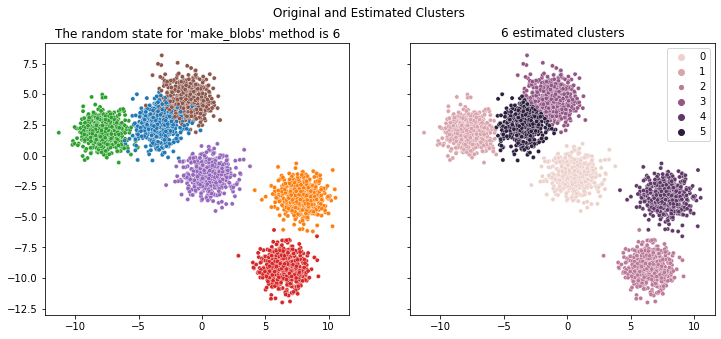

 88%|██████████████████████████████████████████████████████████████████████▉          | 7/8 [1:42:58<14:23, 863.53s/it]

The most frequent value = 6
Frequency counts with random state = 7:
{6: 100}


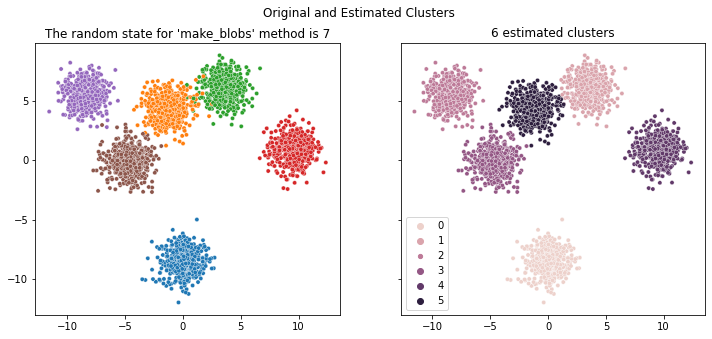

100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [1:56:41<00:00, 875.22s/it]

Wall time: 1h 56min 41s


In [4]:
%%time

true_cluster_n = 6
points_per_cluster = 500
possible_cluster_n = 12

for k in trange(8):
    random_state = k
    Y, y = make_blobs(n_samples=(points_per_cluster*true_cluster_n), 
                      centers= true_cluster_n, n_features=2, 
                      random_state=random_state)
    
    ecnw = ECNW.NumericElbowMethod(start=1, end=possible_cluster_n, 
                                   n_init=100, metric="elbow",
                                   random_state=random_state)
    ecnw.fit(array=Y)
    
    print("The most frequent value = " + str(ecnw.estimated_n_))
    print("Frequency counts with random state = " + str(k)+":")
    print(ecnw.cluster_frequencies_)
    
    warnings.filterwarnings("ignore")
    kmeans = KMeans(n_clusters = ecnw.estimated_n_, 
                                max_iter=300,init = 'k-means++', 
                                n_init=40)
    kmeans.fit(Y)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle('Original and Estimated Clusters')
    sb.scatterplot(ax=axes[0], x=Y[:, 0], y=Y[:, 1], legend=False,
                      hue=_6_colors(y), size = 2)
    axes[0].set_title("The random state for 'make_blobs' method is "+
                      str(random_state))
    
    sb.scatterplot(ax=axes[1], x=Y[:, 0], y=Y[:, 1], 
                      hue=kmeans.labels_, size = 2)
    axes[1].set_title(str(ecnw.estimated_n_) + " estimated clusters")
    plt.show()


                      reliable result, although it can suffice for
                      your business/research objective. It might 
                      be improved with other parameters or methods.
The most frequent value = 25

Frequency counts:
{25: 32, 26: 30, 24: 14, 23: 11, 22: 5, 21: 3, 20: 2, 19: 1, 16: 1, 18: 1}


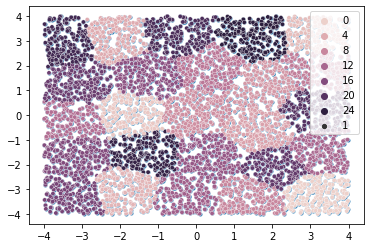

In [5]:
%%time

xu = np.random.uniform(low=-4, high=4, size=5000)
yu = np.random.uniform(low=-4, high=4, size=5000)
data = np.column_stack([xu, yu])
plt.scatter(xu, yu, marker=".")
plt.show()

ecnw0 = ECNW.NumericElbowMethod(start=3, end=26, n_init=100)
ecnw0.fit(array=data)

print("The most frequent value = " + str(ecnw0.estimated_n_))
print("\nFrequency counts:")
print(ecnw0.cluster_frequencies_)
kmeans = KMeans(
        n_clusters=ecnw0.estimated_n_, max_iter=300, init="k-means++",
        n_init=40)
kmeans.fit(data)
sb.scatterplot(x=xu, y=yu, hue=kmeans.labels_, size=1)
plt.show()

I ran the above code several times and kept getting different estimations for a number of clusters and diverse shapes even for the same number of clusters.